In [1]:
import numpy as np

from astropy.io import fits
from astropy.io import ascii

import seaborn as sns
import pandas as pd

from astropy.table import Table

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_dr7 = pd.read_csv("confirmed_compact_galaxies_all_info_dr7.csv")
columnsNamesArr = df_dr7.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['objid', 'ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'link']


In [3]:
distance = df_dr7['distance']
r_mag = df_dr7['r_mag']
g_mag = df_dr7['g_mag']
i_mag = df_dr7['i_mag']
u_mag = df_dr7['u_mag']
z_mag = df_dr7['z_mag']
radius = df_dr7['radius']
abs_mag = df_dr7['magnitude']
ra = df_dr7['ra']
dec = df_dr7['dec']
objid = df_dr7['objid']

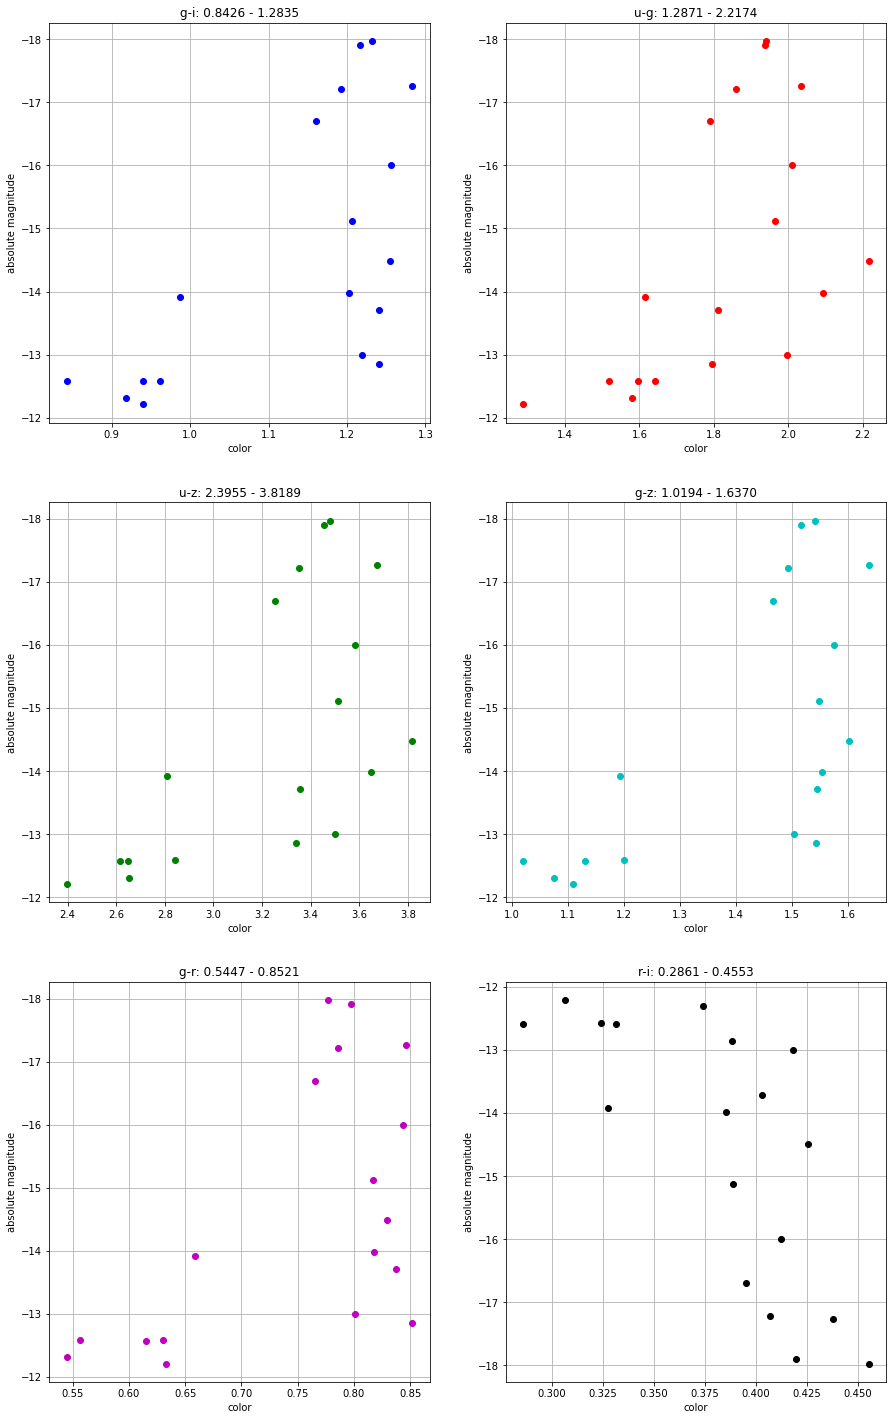

In [4]:
# color/magnitude plots w/color ranges
fig, axs = plt.subplots(3, 2,figsize=(15,25))

axs[0, 0].plot(g_mag - i_mag, abs_mag, 'bo')
axs[0, 0].set_title('g-i: {0:.4f} - {1:.4f}'.format(min(g_mag - i_mag),max(g_mag - i_mag)))
axs[0, 1].plot(u_mag - g_mag, abs_mag, 'ro')
axs[0, 1].set_title('u-g: {0:.4f} - {1:.4f}'.format(min(u_mag - g_mag),max(u_mag - g_mag)))
axs[1, 0].plot(u_mag - z_mag, abs_mag, 'go')
axs[1, 0].set_title('u-z: {0:.4f} - {1:.4f}'.format(min(u_mag - z_mag),max(u_mag - z_mag)))
axs[1, 1].plot(g_mag - z_mag, abs_mag, 'co')
axs[1, 1].set_title('g-z: {0:.4f} - {1:.4f}'.format(min(g_mag - z_mag),max(g_mag - z_mag)))
axs[2, 0].plot(g_mag - r_mag, abs_mag, 'mo')
axs[2, 0].set_title('g-r: {0:.4f} - {1:.4f}'.format(min(g_mag - r_mag),max(g_mag - r_mag)))
axs[2, 1].plot(r_mag - i_mag, abs_mag, 'ko')
axs[2, 1].set_title('r-i: {0:.4f} - {1:.4f}'.format(min(r_mag - i_mag),max(r_mag - i_mag)))

axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()
axs[2, 0].grid()
axs[2, 1].grid()

axs[0, 0].invert_yaxis()
axs[0, 1].invert_yaxis()
axs[1, 0].invert_yaxis()
axs[1, 1].invert_yaxis()
axs[2, 0].invert_yaxis()
axs[2, 1].invert_yaxis()

plt.gca().invert_yaxis()
for ax in axs.flat:
    ax.set(xlabel='color', ylabel='absolute magnitude')

# #Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [5]:
# color numerical ranges
print('g-i: {0:.4f} - {1:.4f}'.format(min(g_mag - i_mag),max(g_mag - i_mag)))
print('u-g: {0:.4f} - {1:.4f}'.format(min(u_mag - g_mag),max(u_mag - g_mag)))
print('u-z: {0:.4f} - {1:.4f}'.format(min(u_mag - z_mag),max(u_mag - z_mag)))
print('g-z: {0:.4f} - {1:.4f}'.format(min(g_mag - z_mag),max(g_mag - z_mag)))
print('g-r: {0:.4f} - {1:.4f}'.format(min(g_mag - r_mag),max(g_mag - r_mag)))
print('r-i: {0:.4f} - {1:.4f}'.format(min(r_mag - i_mag),max(r_mag - i_mag)))

g-i: 0.8426 - 1.2835
u-g: 1.2871 - 2.2174
u-z: 2.3955 - 3.8189
g-z: 1.0194 - 1.6370
g-r: 0.5447 - 0.8521
r-i: 0.2861 - 0.4553


In [9]:
# color ranges with a 0.2 buffer on both sides
print('g-i: {0:.4f} - {1:.4f}'.format(min(g_mag - i_mag) - 0.2, max(g_mag - i_mag) + 0.2))
print('u-g: {0:.4f} - {1:.4f}'.format(min(u_mag - g_mag) - 0.2, max(u_mag - g_mag) + 0.2))
print('u-z: {0:.4f} - {1:.4f}'.format(min(u_mag - z_mag) - 0.2, max(u_mag - z_mag) + 0.2))
print('g-z: {0:.4f} - {1:.4f}'.format(min(g_mag - z_mag) - 0.2, max(g_mag - z_mag) + 0.2))
print('g-r: {0:.4f} - {1:.4f}'.format(min(g_mag - r_mag) - 0.2, max(g_mag - r_mag) + 0.2))
print('r-i: {0:.4f} - {1:.4f}'.format(min(r_mag - i_mag) - 0.2, max(r_mag - i_mag) + 0.2))

g-i: 0.6426 - 1.4835
u-g: 1.0871 - 2.4174
u-z: 2.1955 - 4.0189
g-z: 0.8194 - 1.8370
g-r: 0.3447 - 1.0521
r-i: 0.0861 - 0.6553


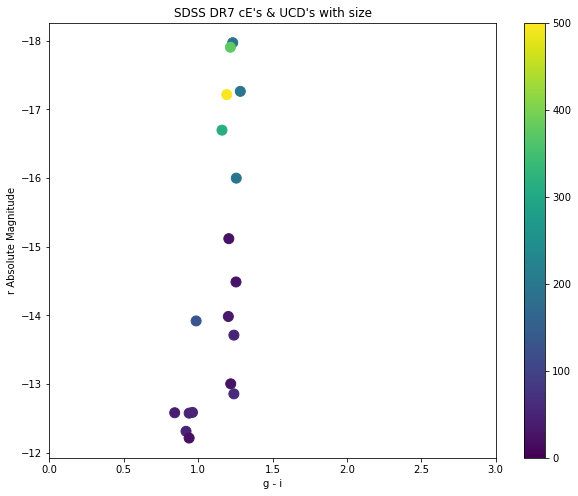

In [6]:
# color vs magnitude and also size 
fig1 = plt.figure(figsize=(10,8))

cm_dr7 = plt.cm.get_cmap('viridis')
sc_dr7 = plt.scatter(g_mag - i_mag, abs_mag, c=radius, vmin=0, vmax=500, s=100, cmap=cm_dr7)
plt.colorbar(sc_dr7)
plt.title("SDSS DR7 cE's & UCD's with size")
plt.xlim(0,3)
plt.xlabel('g - i')
plt.ylabel('r Absolute Magnitude')
plt.gca().invert_yaxis()

plt.show()